In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
y = df['left_company']
X = df.iloc[:, 1:]

In [ ]:
df

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Yes,39,Travel_Rarely,Sales,3,2,4,Female,2,Sales Executive,3,Married,18,3,12,1,0,0,0
996,Yes,26,Travel_Rarely,Sales,4,4,4,Male,2,Sales Executive,4,Single,12,3,8,8,7,7,4
997,Yes,18,Travel_Frequently,Sales,5,3,2,Male,1,Sales Representative,2,Single,14,3,0,0,0,0,0
998,Yes,28,Travel_Rarely,Research & Development,2,4,1,Male,1,Research Scientist,4,Married,13,3,5,3,2,2,2


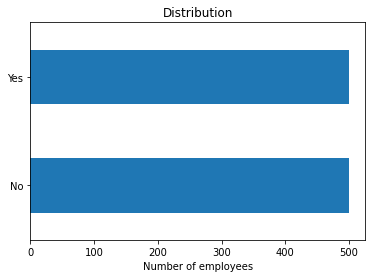

In [ ]:
df['left_company'].value_counts().plot.barh()
plt.title('Distribution')
plt.xlabel('Number of employees')
plt.show()

To check wheather if data is balanced or not.

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
def generate_splits():
    
    y = np.where(df['left_company'] == 'Yes', 1, 0)
    X = df[[x for x in df.columns if x != 'left_company']]

    return train_test_split(X, y, test_size=0.2,random_state = 42)

X_train, X_test, y_train, y_test = generate_splits()

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 800
Test examples: 200


## Train a decison tree model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

numerical_var = ['age', 'commuting_distance', 'education', 'satisfaction_with_environment','seniority_level','satisfaction_with_job','last_raise_pct', 'last_performance_rating',
       'total_years_working', 'years_since_last_promotion','years_at_company','years_in_current_job',
       'years_with_current_supervisor']
ohes = ['frequency_of_travel', 'department','gender','position','married_or_single']

processing_pipeline = ColumnTransformer(transformers=[
    ('numscaling', StandardScaler(), numerical_var),
    ('dummys', OneHotEncoder(drop='first'), ohes)]
)

modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier())]
)

m =  modeling_pipeline.fit(X_train, y_train)
m


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numscaling',
                                                  StandardScaler(),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'satisfaction_with_environment',
                                                   'seniority_level',
                                                   'satisfaction_with_job',
                                                   'last_raise_pct',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_since_last_promotion',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'years_with_current_supervisor']),
                                                 ('dummys',
                                                  OneHotEncoder(drop='first'),
                                                  ['frequency_of_travel',
                                                   'department', 'gender',
                                                   'position',
                                                   'married_or_single'])])),
                ('dt', DecisionTreeClassifier())])

In [ ]:
y_hat = m.predict(X_test)
    
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        96
           1       0.77      0.88      0.82       104

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



## To improve the model we use recall

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'dt__max_depth': [2, 5, 10, 15, 20],
   'dt__min_samples_split':[3, 5, 10, 20, 40],
   'dt__min_samples_leaf': [2, 5],
   'dt__class_weight':[None, 'balanced']
  }
 ]

gcv_results = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, scoring='recall', refit=True)
gcv_results = gcv_results.fit(X_train, y_train)

gcv_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numscaling',
                                                  StandardScaler(),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'satisfaction_with_environment',
                                                   'seniority_level',
                                                   'satisfaction_with_job',
                                                   'last_raise_pct',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_since_last_promotion',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'years_with_current_supervisor']),
                                                 ('dummys',
                                                  OneHotEncoder(drop='first'),
                                                  ['frequency_of_travel',
                                                   'department', 'gender',
                                                   'position',
                                                   'married_or_single'])])),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                                        min_samples_leaf=2,
                                        min_samples_split=3))])

In [ ]:
y_testp = gcv_results.predict(X_test)
y_testp_dt = gcv_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        96
           1       0.78      0.89      0.83       104

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



After recalling we can see there is a decrease from 0.80 to 0.81 approx no change in accuracy.

## Train a random forest model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

numerical_var = ['age', 'commuting_distance', 'education', 'satisfaction_with_environment','seniority_level','satisfaction_with_job','last_raise_pct', 'last_performance_rating',
       'total_years_working', 'years_since_last_promotion','years_at_company','years_in_current_job',
       'years_with_current_supervisor']
ohes = ['frequency_of_travel', 'department','gender','position','married_or_single']

processing_pipeline = ColumnTransformer(transformers=[
    ('numscaling', StandardScaler(), numerical_var),
    ('dummys', OneHotEncoder(drop='first'), ohes)]
)

rf_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('rf', RandomForestClassifier())]
)

modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier())]
)

m =  modeling_pipeline.fit(X_train, y_train)
m

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numscaling',
                                                  StandardScaler(),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'satisfaction_with_environment',
                                                   'seniority_level',
                                                   'satisfaction_with_job',
                                                   'last_raise_pct',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_since_last_promotion',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'years_with_current_supervisor']),
                                                 ('dummys',
                                                  OneHotEncoder(drop='first'),
                                                  ['frequency_of_travel',
                                                   'department', 'gender',
                                                   'position',
                                                   'married_or_single'])])),
                ('dt', DecisionTreeClassifier())])

In [ ]:
y_hat = m.predict(X_test)
    
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        96
           1       0.79      0.88      0.84       104

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



To improve the model we use recall

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'rf__max_depth': [5, 8, 10, 12],
               'rf__n_estimators': [10, 50],
               'rf__class_weight': [None, 'balanced', 'balanced_subsample'],
               'rf__max_samples': [200,440,640]
              }]

rf_results = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring='recall', refit=True)
rf_results = rf_results.fit(X_train, y_train)
rf_yhat = rf_results.predict(X_test)

rf_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numscaling',
                                                  StandardScaler(),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'satisfaction_with_environment',
                                                   'seniority_level',
                                                   'satisfaction_with_job',
                                                   'last_raise_pct',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_since_last_promotion',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'years_with_current_supervisor']),
                                                 ('dummys',
                                                  OneHotEncoder(drop='first'),
                                                  ['frequency_of_travel',
                                                   'department', 'gender',
                                                   'position',
                                                   'married_or_single'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=12, max_samples=440,
                                        n_estimators=50))])

In [ ]:
y_testp = rf_results.predict(X_test)
y_testp_rf = rf_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        96
           1       0.85      0.86      0.85       104

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



After recalling we can see a change from 0.82 to 0.84 approx change in accuracy in random forest.

## Evalvate Models

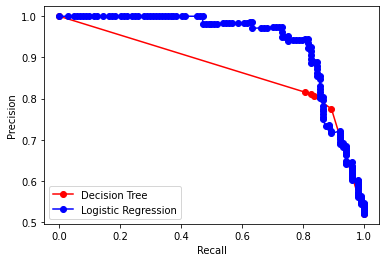

In [ ]:
from sklearn.metrics import precision_recall_curve

def generate_pr(y, probs):
    pr, rec, _ = precision_recall_curve(y, probs)
    return pr, rec
    
pr_dt, rec_dt = generate_pr(y_test, y_testp_dt[:,1])
pr_rf, rec_rf = generate_pr(y_test, y_testp_rf[:,1])

plt.plot(rec_dt, pr_dt,'-or')
plt.plot(rec_rf, pr_rf,'-ob')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['Decision Tree','Logistic Regression'])
plt.show()

## Explain findings

We can see from the accuracy from above that the random forest model outperforms the decision tree model. This could be because random forest is an ensemble approach that mixes several decision trees, reducing overfitting and enhancing generalization. In addition, compared to decision trees, random forest can accommodate a greater number of input characteristics and is less susceptible to outliers.

Decision Tree Accuracy : 0.80

Random Forest Accuracty : 0.82